Ошибка загрузки изображения http://images.cocodataset.org/train2017/000000109519.jpg. Пробуем другое...
Ошибка загрузки изображения http://images.cocodataset.org/train2017/000000061450.jpg. Пробуем другое...
Ошибка загрузки изображения http://images.cocodataset.org/train2017/000000078120.jpg. Пробуем другое...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/19.8M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/19.7M [00:00<?, ?B/s]

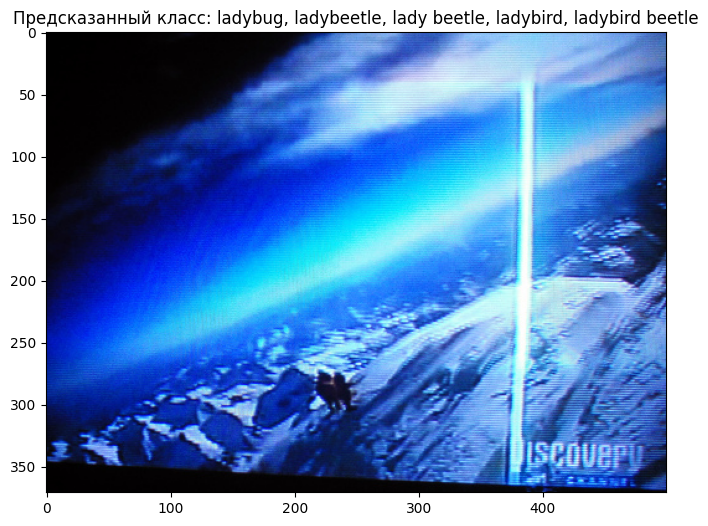

In [1]:
from transformers import AutoImageProcessor, MobileViTV2ForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt
import random

# Выбор изображения из COCO
def get_random_coco_image():
    random_image_id = random.randint(1, 120000)
    url = f"http://images.cocodataset.org/train2017/{random_image_id:012d}.jpg"

    # Избегание ошибки загрузки изображения
    try:
        response = requests.get(url, stream=True, timeout=5)
        response.raise_for_status()
        image = Image.open(response.raw)
        return image
    except Exception as e:
        print(f"Ошибка загрузки изображения {url}. Пробуем другое...")
        return get_random_coco_image()

# Загрузка изображения
image = get_random_coco_image()

# Загрузка модели
image_processor = AutoImageProcessor.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")
model = MobileViTV2ForImageClassification.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")

# классификацтя
inputs = image_processor(image, return_tensors="pt")
logits = model(**inputs).logits
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]

# Результат
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title(f"Предсказанный класс: {predicted_class}", fontsize=12)
plt.show()
